# Predicting FIFA World Cup 2022

## Importing libraries

In [336]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

## Reading the database

In [337]:
final_df = pd.read_csv('data/train_features.csv')
final_df.tail()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result_numeric
9316,Netherlands,Wales,10,18,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0,1
9317,Poland,Belgium,26,2,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0,0
9318,Chile,Ghana,28,60,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,0
9319,Japan,Tunisia,23,35,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,0
9320,Korea Republic,Egypt,29,32,75.0,70.0,73.0,80.0,74.0,70.0,79.0,71.0,1


### custom function 

In [338]:
def decimalToBinary(n,byte):
    n=bin(n).replace("0b", "")
    #print(n)
    code=np.zeros([byte])
    for i in range(len(n)):
        code[(byte-len(n))+i]=n[i]
    return code

def to_bin_hot(labels, dimension):
    Bin_labels=np.zeros([len(labels),dimension])
    for i in range(len(labels)):
        Bin_labels[i]= decimalToBinary(labels[i],dimension)
    return Bin_labels

def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, int(label)] = 1.
    return results

### Train data 

get X and y

{'Win':1, 'Draw':2, 'Lose':0}

In [339]:
y=final_df['home_team_result_numeric']
X=final_df.iloc[:,2:-1]
y.value_counts()

1    4535
0    2680
2    2106
Name: home_team_result_numeric, dtype: int64

scaling

In [340]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

slit data to train and test 

In [341]:
#one_hot_train_labels = to_one_hot(y,3)
#one_hot_test_labels = to_one_hot(y,3)

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=42)

#X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val_, test_size=0.3, random_state=42)

In [343]:
# stetting lose and draw to 0 
y_test=y_test_
y_test[y_test==2]=0

y_train=y_train_
y_train[y_train==2]=0

#### metrics function

In [344]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [345]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict,average='macro')
    print("f1: %.2f%%" % (f1 * 100.0)) 
    rec = recall_score(y_test, y_predict, average='macro')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='macro')
    print("precision: %.2f%%" % (prc * 100.0)) 

In [346]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Train the model 

#### Neural network

Epoch 1/300
27/27 [==============================] - 11s 218ms/step - loss: 4.2669 - accuracy: 0.5237 - val_loss: 0.6474 - val_accuracy: 0.6169
Epoch 2/300
27/27 [==============================] - 4s 165ms/step - loss: 0.9306 - accuracy: 0.5881 - val_loss: 0.6096 - val_accuracy: 0.6414
Epoch 3/300
27/27 [==============================] - 2s 82ms/step - loss: 0.7755 - accuracy: 0.5810 - val_loss: 0.6106 - val_accuracy: 0.6835
Epoch 4/300
27/27 [==============================] - 2s 73ms/step - loss: 0.6947 - accuracy: 0.6131 - val_loss: 0.5854 - val_accuracy: 0.6981
Epoch 5/300
27/27 [==============================] - 2s 81ms/step - loss: 0.6617 - accuracy: 0.6334 - val_loss: 0.6024 - val_accuracy: 0.7011
Epoch 6/300
27/27 [==============================] - 2s 73ms/step - loss: 0.6479 - accuracy: 0.6351 - val_loss: 0.5977 - val_accuracy: 0.6881
Epoch 7/300
27/27 [==============================] - 2s 71ms/step - loss: 0.6416 - accuracy: 0.6317 - val_loss: 0.6028 - val_accuracy: 0.6927
Epo

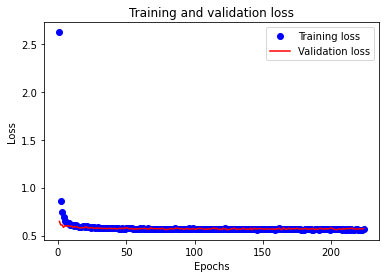

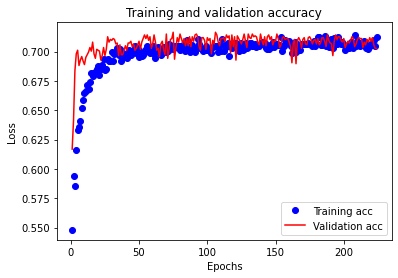

Acurácia: 0.7086143493652344
Loss: 0.5575383901596069


In [347]:
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

history = model.fit(X_train,y_train,epochs=300,validation_split=0.2,batch_size=200, callbacks=[es])

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

score = model.evaluate(X_train, y_train, verbose=0)

print('Acurácia:', score[1])
print('Loss:', score[0])


confusion_matrix: 
Classification results:
f1: 71.86%
recall: 71.90%
precision: 72.45%
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      1439
           1       0.75      0.65      0.69      1358

    accuracy                           0.72      2797
   macro avg       0.72      0.72      0.72      2797
weighted avg       0.72      0.72      0.72      2797



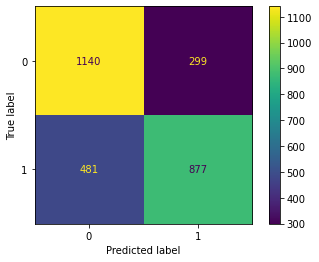

In [348]:
print("confusion_matrix: ")
evaluate_results(y_test, y_pred1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1);

including the draw result 

In [377]:
y_pred1 = model.predict(X_test) # get MLP predict

y_pred_ = np.argmax(y_pred1,axis=1) # get the binary responce into 0 and 1 

diff =lambda x: abs(x[:,0]-x[:,1]) # verify the dif between first bit and second 
draw_threshlod= abs(diff(y_pred1))[np.where(y[y_test.index]==2)[0]].mean() # get the mean value of diff were the real outuput is dras- 2

y_pred_[diff(y_pred1)<draw_threshlod]=2 # set 2 where the diff between bits are lower than  draw_threshlod

In [389]:
y_pred1

array([[8.0424243e-06, 9.9999201e-01],
       [5.3973269e-01, 4.6026728e-01],
       [7.5710124e-01, 2.4289882e-01],
       ...,
       [4.1844022e-01, 5.8155978e-01],
       [7.1483892e-01, 2.8516108e-01],
       [2.3238564e-01, 7.6761436e-01]], dtype=float32)

Classification results:
f1: 46.57%
recall: 49.72%
precision: 54.91%


confusion_matrix: 
Classification results:
f1: 46.57%
recall: 49.72%
precision: 54.91%
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       783
           1       0.85      0.32      0.47      1358
           2       0.26      0.54      0.35       656

    accuracy                           0.46      2797
   macro avg       0.55      0.50      0.47      2797
weighted avg       0.62      0.46      0.47      2797



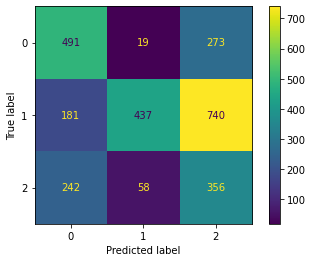

In [392]:
print("confusion_matrix: ")
evaluate_results(y[y_test.index], y_pred_)
print(classification_report(y[y_test.index],y_pred_))

ConfusionMatrixDisplay.from_predictions(y[y_test.index],y_pred_);

In [385]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("models_predict/MLP_model")

INFO:tensorflow:Assets written to: models_predict/MLP_model\assets
